In [248]:
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
import pandasql as sql
from warnings import filterwarnings

In [3]:
data_train = pd.read_csv('Flight_Train.csv')

In [4]:
data_train['source'] = 'Train'

In [5]:
data_train.duplicated().sum()

220

In [6]:
data_train.drop_duplicates(inplace = True)

In [ ]:
data_train.head(2)

In [7]:
data_test = pd.read_csv('Flight_Test.csv')

In [8]:
data_test['source'] = 'Test'

In [9]:
data_train.shape,data_test.shape

((10463, 12), (2671, 11))

In [ ]:
data_test.head(2)

In [10]:
data = data_train.append(data_test,ignore_index=True)

C:\Users\janani.jayavel\AppData\Local\Temp\ipykernel_20856\3983613435.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_train.append(data_test,ignore_index=True)


In [11]:
data.shape

(13134, 12)

In [ ]:
data.head(2)

In [12]:
data['source'].unique()

array(['Train', 'Test'], dtype=object)

In [13]:
data.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
source                0
dtype: int64

In [14]:
data.dropna(subset = ['Route','Total_Stops'],inplace = True)

In [15]:
data['Destination'].replace({'New Delhi':'Delhi'},inplace = True)

In [16]:
data.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
source                0
dtype: int64

In [17]:
data_train.shape,data_test.shape,data.shape

((10463, 12), (2671, 11), (13133, 12))

In [18]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [21]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [22]:
data['Destination'].replace({'New Delhi':'Delhi'},inplace = True)

In [23]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
data.shape

In [24]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'],dayfirst = True)

In [25]:
data['Date_of_Journey']

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
13129   2019-06-06
13130   2019-03-27
13131   2019-03-06
13132   2019-03-06
13133   2019-06-15
Name: Date_of_Journey, Length: 13133, dtype: datetime64[ns]

In [26]:
data['Day_of_Journey'] = data['Date_of_Journey'].dt.dayofweek

In [27]:
data['Day_of_Journey'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'},inplace = True)

In [28]:
data['Day_of_Journey']

0           Sunday
1        Wednesday
2           Sunday
3           Sunday
4           Friday
           ...    
13129     Thursday
13130    Wednesday
13131    Wednesday
13132    Wednesday
13133     Saturday
Name: Day_of_Journey, Length: 13133, dtype: object

In [29]:
data['Date_of_Journey']

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
13129   2019-06-06
13130   2019-03-27
13131   2019-03-06
13132   2019-03-06
13133   2019-06-15
Name: Date_of_Journey, Length: 13133, dtype: datetime64[ns]

In [30]:
data['Month'] = data['Date_of_Journey'].dt.month

In [31]:
data['Month'].unique()

array([3, 5, 6, 4], dtype=int64)

In [32]:
data['Month'].replace({3:'March',4:'April',5:'May',6:'June'},inplace = True)

In [33]:
data = data.drop(columns ='Date_of_Journey')

In [ ]:
data.head(2)

In [34]:
data['Route'].nunique()

132

In [35]:
data = data.drop(columns = 'Route')

In [36]:
data['Duration'].nunique()

374

In [37]:
data['Duration_Min'] = (pd.to_timedelta(data['Duration']).dt.seconds // 60).astype(int)

In [39]:
del data['Duration']

In [40]:
data.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,source,Day_of_Journey,Month,Duration_Min
0,IndiGo,Banglore,Delhi,22:20,01:10 22 Mar,non-stop,No info,3897.0,Train,Sunday,March,170
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,No info,7662.0,Train,Wednesday,May,445


In [41]:
data.loc[data['Dep_Time'] < '12:00','Dep_Time']='AM'

In [42]:
data.loc[data['Dep_Time'] !='AM','Dep_Time']='AM'

In [43]:
data['Arrival_Time'] = data['Arrival_Time'].apply(lambda x: x.split()[0])

In [44]:
data.loc[data['Arrival_Time'] < '12:00','Arrival_Time']='AM'

In [45]:
data.loc[data['Arrival_Time'] != 'AM','Arrival_Time']='PM'

In [46]:
data['Additional_Info'].value_counts()

No info                         10330
In-flight meal not included      2370
No check-in baggage included      394
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [47]:
data.groupby('Additional_Info')['Price'].mean()

Additional_Info
1 Long layover                  22109.631579
1 Short layover                 26743.000000
2 Long layover                  26480.000000
Business class                  56811.250000
Change airports                 16800.714286
In-flight meal not included      9435.647456
No Info                          8044.666667
No check-in baggage included     3642.465409
No info                          9075.257394
Red-eye flight                  10873.000000
Name: Price, dtype: float64

In [48]:
data['Additional_Info'].replace({'No info':'No Info'},inplace = True)

In [49]:
data['Duration_Min'] = data['Duration_Min'].astype(int)

In [50]:
data

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,source,Day_of_Journey,Month,Duration_Min
0,IndiGo,Banglore,Delhi,AM,AM,non-stop,No Info,3897.0,Train,Sunday,March,170
1,Air India,Kolkata,Banglore,AM,PM,2 stops,No Info,7662.0,Train,Wednesday,May,445
2,Jet Airways,Delhi,Cochin,AM,AM,2 stops,No Info,13882.0,Train,Sunday,June,1140
3,IndiGo,Kolkata,Banglore,AM,PM,1 stop,No Info,6218.0,Train,Sunday,May,325
4,IndiGo,Banglore,Delhi,AM,PM,1 stop,No Info,13302.0,Train,Friday,March,285
...,...,...,...,...,...,...,...,...,...,...,...,...
13129,Air India,Kolkata,Banglore,AM,PM,1 stop,No Info,NaN,Test,Thursday,June,1435
13130,IndiGo,Kolkata,Banglore,AM,PM,non-stop,No Info,NaN,Test,Wednesday,March,155
13131,Jet Airways,Delhi,Cochin,AM,AM,1 stop,No Info,NaN,Test,Wednesday,March,395
13132,Air India,Delhi,Cochin,AM,PM,1 stop,No Info,NaN,Test,Wednesday,March,915


In [51]:
data['source'].value_counts()

Train    10462
Test      2671
Name: source, dtype: int64

In [52]:
data_cat = data.select_dtypes(exclude = np.number)

In [53]:
data_cat.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'source', 'Day_of_Journey', 'Month'],
      dtype='object')

In [54]:
data_cat.drop(columns = 'source')

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Day_of_Journey,Month
0,IndiGo,Banglore,Delhi,AM,AM,non-stop,No Info,Sunday,March
1,Air India,Kolkata,Banglore,AM,PM,2 stops,No Info,Wednesday,May
2,Jet Airways,Delhi,Cochin,AM,AM,2 stops,No Info,Sunday,June
3,IndiGo,Kolkata,Banglore,AM,PM,1 stop,No Info,Sunday,May
4,IndiGo,Banglore,Delhi,AM,PM,1 stop,No Info,Friday,March
...,...,...,...,...,...,...,...,...,...
13129,Air India,Kolkata,Banglore,AM,PM,1 stop,No Info,Thursday,June
13130,IndiGo,Kolkata,Banglore,AM,PM,non-stop,No Info,Wednesday,March
13131,Jet Airways,Delhi,Cochin,AM,AM,1 stop,No Info,Wednesday,March
13132,Air India,Delhi,Cochin,AM,PM,1 stop,No Info,Wednesday,March


In [55]:
data_cat = pd.get_dummies(data_cat)

In [56]:
data_cat = data_cat.reset_index().drop(columns = 'index')

In [57]:
data_num = data.select_dtypes(include = np.number)

In [58]:
data_num = data_num.reset_index().drop(columns = 'index')

In [59]:
data_source = data['source'].reset_index().drop(columns = 'index')

In [60]:
data_preprocessed = pd.concat([data_cat,data_num,data_source],axis = 1)

In [61]:
data_preprocessed_train = data_preprocessed[data_preprocessed['source']=='Train']

In [62]:
data_preprocessed_test = data_preprocessed[data_preprocessed['source']=='Test']

In [63]:
data_preprocessed_train_x = data_preprocessed_train.drop(columns = ['Price','source'])

In [64]:
data_preprocessed_train_y = data_preprocessed_train['Price']

In [66]:
data_preprocessed_test_x = data_preprocessed_test.drop(columns = ['Price','source'])

In [85]:
reg = LinearRegression()

In [86]:
reg.fit(data_preprocessed_train_x,data_preprocessed_train_y)

LinearRegression()

In [87]:
reg.intercept_

18355453772072.06

In [88]:
reg.coef_

array([-1.83554538e+13, -1.83554538e+13, -1.83554538e+13, -1.83554538e+13,
       -1.83554538e+13, -1.83554537e+13, -1.83554538e+13, -1.83554538e+13,
       -1.83554538e+13, -1.83554538e+13, -1.83554538e+13, -1.83554538e+13,
        1.72355469e+02,  1.37305176e+02,  1.34910645e+02,  1.29845703e+02,
       -6.54407227e+02,  1.28953125e+02,  1.24968750e+02,  2.52747070e+02,
       -6.48388672e+02,  1.41511230e+02,  3.12500000e-02,  2.95129395e+01,
       -2.94785156e+01, -7.93554688e+02,  1.14121484e+03,  2.47641016e+03,
        1.53292732e+03, -4.35745605e+03,  1.80120569e+03,  6.98374078e+03,
        6.83473549e+03,  8.93082239e+03, -2.39180362e+03, -9.33323682e+03,
       -5.62089941e+03, -5.73740527e+03, -1.46711438e+03,  0.00000000e+00,
        0.00000000e+00,  1.20775647e+03, -2.82735352e+02,  6.39252930e+01,
        2.49418945e+02, -7.44451172e+02, -1.48146484e+02, -3.45802979e+02,
       -1.04198999e+03, -1.92390625e+02,  1.33453223e+03, -1.00001953e+02,
        2.48046875e-01])

<Axes: >

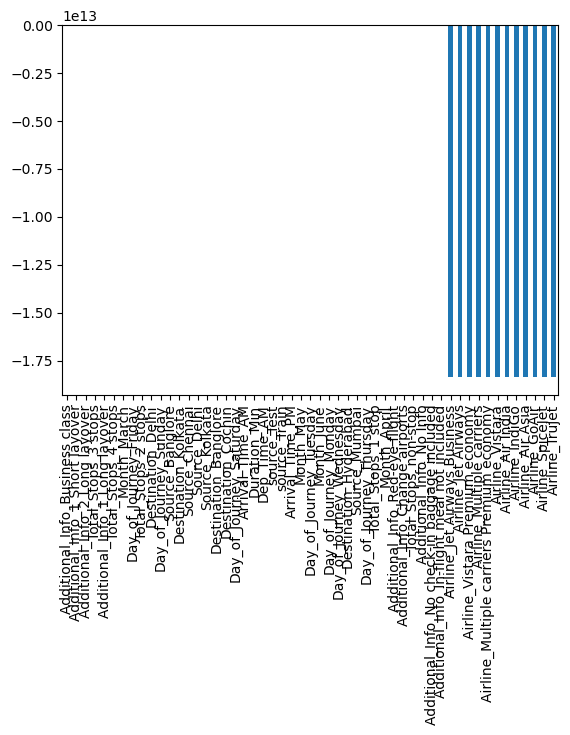

In [93]:
pd.Series(reg.coef_,data_preprocessed_train_x.columns).sort_values(ascending = False).plot(kind = 'bar')

In [89]:
data_train_predict = reg.predict(data_preprocessed_train_x)

In [90]:
data_train_predict

array([ 6032.41796875, 10880.80859375, 15924.83203125, ...,
        9318.16796875,  8820.546875  , 10496.8828125 ])

In [249]:
rscore = r2_score(data_preprocessed_train_y , data_train_predict)

In [250]:
rscore

0.6356770941879961

# Linear rscore - 0.6356770941879961

In [137]:
 data_test_predict = reg.predict(data_preprocessed_test_x)

In [138]:
 data_test_predict

array([12875.88671875,  8012.84375   ,  9984.25390625, ...,
       14736.96875   , 10498.23828125, 11064.9453125 ])

In [141]:
data_test_predict = pd.Series(data_test_predict)

In [142]:
data_result = pd.concat([data_test,data_test_predict],axis = 1)

In [144]:
data_result.to_csv('Linear.csv',index=False)

# Ridge Regression

In [253]:
ridge = Ridge(alpha = 10)

In [254]:
ridge.fit(data_preprocessed_train_x,data_preprocessed_train_y)

Ridge(alpha=10)

In [255]:
ridge.intercept_

14069.932647925485

In [256]:
ridge.coef_

array([-3.36984656e+03, -1.66823792e+03, -3.35146033e+03, -3.19308796e+03,
        2.56891592e+03,  1.44916252e+04,  7.80573543e+00, -1.79348024e+02,
       -3.49968129e+03, -5.78295810e+02, -1.29795703e+03,  6.95681120e+01,
        2.45797123e+02,  1.41696676e+02,  1.28157281e+02,  1.24323779e+02,
       -6.39974858e+02,  1.24323779e+02,  1.28157281e+02,  2.45797123e+02,
       -6.39974858e+02,  1.41696676e+02,  0.00000000e+00,  3.76222567e+01,
       -3.76222567e+01, -2.89411682e+02,  1.67095413e+03,  2.38593304e+03,
        1.72265437e+02, -3.93974092e+03,  2.75643663e+03,  8.46887187e+02,
        8.31456269e+02,  8.07700452e+03,  8.79892926e+01, -6.64214115e+03,
       -3.00856783e+03, -3.02635076e+03,  7.72858457e+01,  0.00000000e+00,
        0.00000000e+00,  1.32861601e+03, -2.98225211e+02,  3.83744401e+01,
        2.31480707e+02, -7.69014899e+02, -1.66355661e+02, -3.64875385e+02,
       -1.04968108e+03, -1.98244939e+02,  1.36579239e+03, -1.17866367e+02,
        2.35670512e-01])

<Axes: >

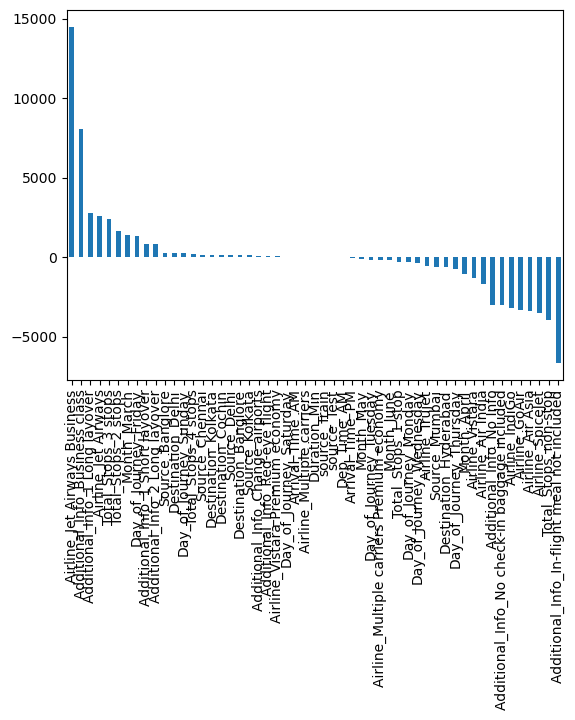

In [257]:
pd.Series(ridge.coef_,data_preprocessed_train_x.columns).sort_values(ascending = False).plot(kind = 'bar')

In [258]:
data_train_predict = ridge.predict(data_preprocessed_train_x)

In [259]:
data_train_predict

array([ 6095.0895155 , 10897.23795017, 15897.07183237, ...,
        9250.87035752,  9009.7545342 , 10513.7273186 ])

In [260]:
rscore = r2_score(data_preprocessed_train_y , data_train_predict)

In [261]:
rscore

0.680991000173317

# Ridge rscore - 0.680991000173317

In [145]:
data_test_predict = ridge.predict(data_preprocessed_test_x)

In [146]:
data_test_predict 

array([12821.91021407,  8035.31024982,  9977.59648758, ...,
       14728.81272346, 10538.96303578, 11041.25731331])

In [147]:
data_test_predict = pd.Series(data_test_predict)

In [148]:
data_result = pd.concat([data_test,data_test_predict],axis = 1)

In [149]:
data_result.to_csv('Ridge.csv',index=False)

# Lasso

In [273]:
from sklearn.linear_model import Lasso

In [274]:
Lasso = Lasso(alpha = 10)

In [275]:
Lasso.fit(data_preprocessed_train_x,data_preprocessed_train_y)

Lasso(alpha=10)

In [276]:
Lasso.intercept_

9876.334708690292

In [277]:
Lasso.coef_

array([-1.54829649e+03, -0.00000000e+00, -1.41727191e+03, -1.58074923e+03,
        4.08799836e+03,  2.83785732e+04,  1.44323977e+03,  0.00000000e+00,
       -1.82158748e+03, -0.00000000e+00,  2.67322818e+01,  0.00000000e+00,
        2.51092091e+02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -1.30102105e+03, -0.00000000e+00,  0.00000000e+00,  3.00759552e-01,
       -4.97719708e+01,  0.00000000e+00,  0.00000000e+00,  8.27450251e+00,
       -1.17876819e-14, -7.80770837e+02,  1.00442284e+03,  0.00000000e+00,
        0.00000000e+00, -4.48871734e+03,  1.62848230e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.59540744e+03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.48913507e+03, -9.17086259e+01,  1.27243630e+02,
        2.98956156e+02, -5.50612034e+02, -0.00000000e+00, -1.69712999e+02,
       -8.23530694e+02, -0.00000000e+00,  1.53041938e+03,  0.00000000e+00,
        3.49056028e-01])

<Axes: >

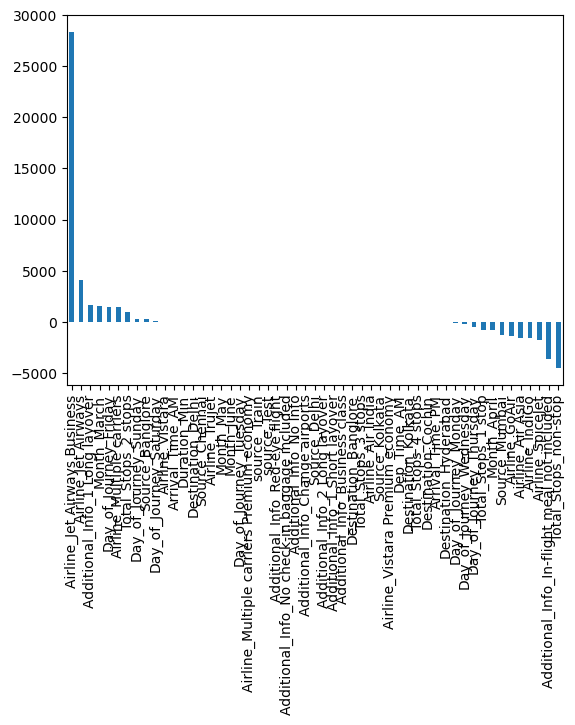

In [278]:
pd.Series(Lasso.coef_,data_preprocessed_train_x.columns).sort_values(ascending = False).plot(kind = 'bar')

In [279]:
data_train_predict = Lasso.predict(data_preprocessed_train_x)

In [280]:
data_train_predict

array([ 5955.25055599, 10866.37448389, 15673.91044107, ...,
        9101.82609859,  8741.14591767, 10504.67353104])

In [281]:
rscore = r2_score(data_preprocessed_train_y , data_train_predict)

In [282]:
rscore

0.6805966634577599

# Lasso rscore - 0.6805966634577599

In [284]:
data_test_predict = Lasso.predict(data_preprocessed_test_x)

In [285]:
data_test_predict 

array([12869.85639875,  7905.81875071, 10085.55963173, ...,
       14690.42024994, 10775.65652139, 10966.23545354])

In [216]:
data_test_predict = pd.Series(data_test_predict)

In [217]:
data_result = pd.concat([data_test,data_test_predict],axis = 1)

In [218]:
data_result.to_csv('Lasso.csv',index=False)

# Elastic Net

In [286]:
Elastic = ElasticNet(alpha = 10)

In [287]:
Elastic.fit(data_preprocessed_train_x,data_preprocessed_train_y)

ElasticNet(alpha=10)

In [288]:
Elastic.intercept_

6398.385729543235

In [289]:
Elastic.coef_

array([ -14.98310612,    2.37022887,   -6.94008101,  -83.05854779,
        123.10851997,    4.70346784,   21.83573034,    0.        ,
        -43.5871291 ,   -0.        ,   -2.87795766,    0.        ,
         -0.        ,  -14.71975529,   45.00381881,   -2.78297346,
        -25.28540175,   -2.78305395,   45.00386253,   -0.        ,
        -25.28539031,  -14.71975934,    0.        ,  -17.15697562,
         17.15700334,   74.80178095,   54.82608167,    1.92943546,
          0.        , -133.73815155,    3.00676   ,    0.        ,
          0.        ,    2.69656928,    0.        ,  -14.34588474,
         25.1208368 ,  -19.19505165,    0.        ,    0.        ,
          0.        ,   23.53230511,  -17.28694643,   -3.41538656,
         13.48021836,  -14.00977917,   -1.09713901,    0.        ,
        -43.36401944,  -22.91269675,   75.04486196,   -6.76816126,
          5.25396084])

<Axes: >

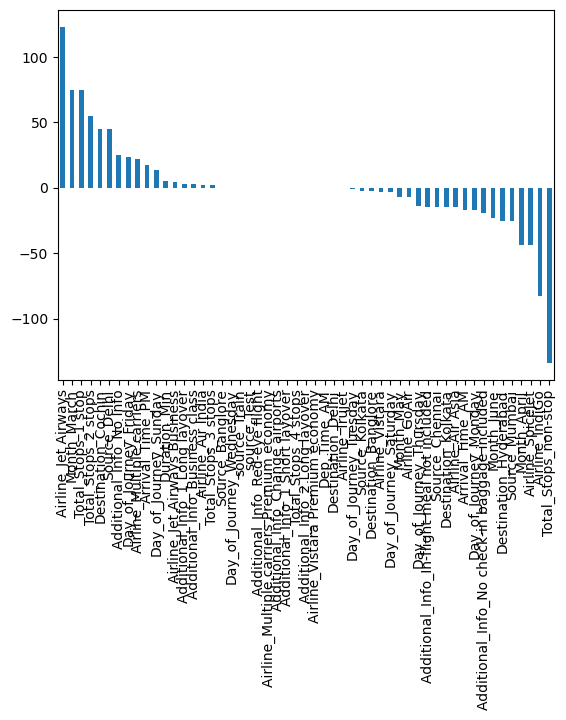

In [119]:
pd.Series(Elastic.coef_,data_preprocessed_train_x.columns).sort_values(ascending = False).plot(kind = 'bar')

In [290]:
data_train_predict = Elastic.predict(data_preprocessed_train_x)

In [291]:
data_train_predict

array([ 7171.25131491,  8823.53826643, 12654.37475565, ...,
        7294.65350478,  7243.25836233,  9194.07004234])

In [292]:
rscore = r2_score(data_preprocessed_train_y , data_train_predict)

In [293]:
rscore

0.2363292223805611

# Elastic rscore - 0.2363292223805611

In [154]:
data_test_predict = Elastic.predict(data_preprocessed_test_x)

In [155]:
data_test_predict 

array([10098.68944884,  7660.18945576, 14168.14373054, ...,
        8844.62696769, 11490.2622936 , 11119.38700347])

In [156]:
data_test_predict = pd.Series(data_test_predict)

In [157]:
data_result = pd.concat([data_test,data_test_predict],axis = 1)

In [158]:
data_result.to_csv('Elastic.csv',index=False)

# Polynomial Linear

In [294]:
Poly = PolynomialFeatures(degree = 2, include_bias=False)

In [295]:
Poly.fit(data_preprocessed_train_x)

PolynomialFeatures(include_bias=False)

In [296]:
data_train_poly_x = Poly.transform(data_preprocessed_train_x)

In [297]:
data_test_poly_x = Poly.transform(data_preprocessed_test_x)

In [298]:
model = LinearRegression()

In [299]:
model.fit(data_train_poly_x,data_preprocessed_train_y)

LinearRegression()

In [300]:
model.intercept_

12948.793665948466

In [301]:
model.coef_

array([-4.87603924e+02, -3.06998916e+02,  1.86469837e+01, ...,
       -1.81772380e+01,  6.11198351e-01, -6.81719916e-04])

In [302]:
data_train_predict = model.predict(data_train_poly_x)

In [303]:
data_train_predict

array([ 7199.12206349, 12312.41863973, 14319.35143112, ...,
        6956.90617061, 11326.61249721, 11765.56479723])

In [304]:
rscore = r2_score(data_preprocessed_train_y , data_train_predict)

In [305]:
rscore

0.8054471532892965

# Polynomial rscore - 0.8054471532892965

In [169]:
data_test_predict = model.predict(data_test_poly_x)

In [170]:
data_test_predict

array([12726.89667109,  6508.74709056, 10288.46630713, ...,
       13158.21070425,  9411.76974042,  8381.88169252])

In [171]:
data_test_predict =pd.Series(data_test_predict)

In [172]:
data_result = pd.concat([data_test,data_test_predict],axis = 1)

In [173]:
data_result.to_csv('Poly.csv',index=False)

# Polynomial Ridge

In [306]:
ridge = Ridge(alpha = 10)

In [307]:
ridge.fit(data_train_poly_x,data_preprocessed_train_y)

Ridge(alpha=10)

In [308]:
data_train_predict = ridge.predict(data_train_poly_x)

In [309]:
data_train_predict

array([ 7136.07636071, 12362.1587198 , 14217.18898977, ...,
        7038.81822302, 11022.07788466, 11807.04521042])

In [310]:
rscore = r2_score(data_preprocessed_train_y , data_train_predict)

In [311]:
rscore

0.8022494310125693

# PolyRidge Rscore - 0.8022494310125693

In [184]:
data_test_predict = ridge.predict(data_test_poly_x)

In [185]:
data_test_predict

array([11369.70749499,  5951.39602699,  6909.27879807, ...,
       12838.53956265,  7260.83079487,  6276.48677699])

In [186]:
data_test_predict =pd.Series(data_test_predict)

In [188]:
data_result = pd.concat([data_test,data_test_predict],axis = 1)

In [189]:
data_result.to_csv('PolyRidge.csv',index=False)

# PolyLasso

In [312]:
from sklearn.linear_model import Lasso

In [313]:
lasso = Lasso(alpha = 10)

In [314]:
lasso.fit(data_train_poly_x,data_preprocessed_train_y)

Lasso(alpha=10)

In [315]:
data_train_predict = lasso.predict(data_train_poly_x)

In [316]:
data_train_predict

array([ 6727.44689227, 11850.09280183, 15053.69399055, ...,
        7529.82101412,  9918.68048528, 12219.54125895])

In [317]:
rscore = r2_score(data_preprocessed_train_y , data_train_predict)

In [318]:
rscore

0.7700225678667987

# polyLasso rscore 0.7700225678667987

In [232]:
data_test_predict = lasso.predict(data_test_poly_x)

In [233]:
data_test_predict

array([14523.36891791,  6629.64461824, 11483.56960214, ...,
       15992.58028955, 10236.56137995, 10665.10959841])

In [234]:
data_test_predict =pd.Series(data_test_predict)

In [235]:
data_result = pd.concat([data_test,data_test_predict],axis = 1)

In [236]:
data_result.to_csv('PolyLasso.csv',index=False)

# polyElasticNet

In [319]:
elastic = ElasticNet(alpha = 10)

In [320]:
elastic.fit(data_train_poly_x,data_preprocessed_train_y)

ElasticNet(alpha=10)

In [321]:
data_train_predict = elastic.predict(data_train_poly_x)

In [322]:
data_train_predict

array([ 5264.41566203, 11052.34362833, 17114.37136504, ...,
        6044.50419033,  6858.10762789, 11170.54602362])

In [317]:
rscore = r2_score(data_preprocessed_train_y , data_train_predict)

In [323]:
rscore

0.7700225678667987

# PolyElastic rscore 0.7700225678667987

In [242]:
data_test_predict = elastic.predict(data_test_poly_x)

In [243]:
data_test_predict

array([11836.55101431,  8265.82700352,  6532.27421377, ...,
       12254.54608105,  9813.80580673,  9327.69665544])

In [244]:
data_test_predict =pd.Series(data_test_predict)

In [245]:
data_result = pd.concat([data_test,data_test_predict],axis = 1)

In [246]:
data_result.to_csv('PolyElastic.csv',index=False)

# Linear rscore - 0.6356770941879961

# Ridge rscore - 0.680991000173317

# Lasso rscore - 0.6805966634577599

# Elastic rscore - 0.2363292223805611

# Polynomial rscore - 0.8054471532892965

# polyLasso rscore 0.7700225678667987

# PolyRidge Rscore - 0.8022494310125693

# PolyElastic rscore 0.7700225678667987